# OR Suite Demonstration

Reinforcement learning (RL) is a natural model for problems involving real-time sequential decision making. In these models, a principal interacts with a system having stochastic transitions and rewards and aims to control the system online (by exploring available actions using real-time feedback) or offline (by exploiting known properties of the system).

These project revolves around providing a unified landscape on scaling reinforcement learning algorithms to operations research domains.

In this notebook we walk through generating plots, and applying the problem to the `ambulance problem` on the line $[0,1]$.

### Step 1: Import Required Packages

The main package for ORSuite is contained in `or_suite`.  However, some additional packages may be required for specific environments / algorithms.  Here, we include `stable baselines`, a package containing implementation for state of the art deep RL algorithms, and `matploblib` for the plotting.

In [1]:
import or_suite
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
import numpy as np

### Step 2: Pick problem parameters for the environment

Here we use the ambulance metric environment as outlined in `or_suite/envs/ambulance/ambulance_metric.py`.  The package has default specifications for all of the environments in the file `or_suite/envs/env_configs.py`, and so we use one the default for the ambulance problem in a metric space.

In addition, we need to specify the number of episodes for learning, and the number of iterations (in order to plot average results with confidence intervals).

In [2]:
DEFAULT_CONFIG = or_suite.envs.env_configs.ambulance_metric_default_config
epLen = DEFAULT_CONFIG['epLen']
nEps = 200
numIters = 5

### Step 3: Pick simulation parameters

Next we need to specify parameters for the simulation.  This includes setting a seed, the frequency to record the metrics, directory path for saving the data files, a deBug mode which prints the trajectory, etc.

In [3]:
DEFAULT_SETTINGS = {'seed': 1, 
                    'recFreq': 1, 
                    'dirPath': '../data/ambulance/', 
                    'deBug': False, 
                    'nEps': nEps, 
                    'numIters': numIters, 
                    'saveTrajectory': True, 
                    'epLen' : 5}

ambulance_env = gym.make('Ambulance-v0', config=DEFAULT_CONFIG)
mon_env = Monitor(ambulance_env)

### Step 4: Pick list of algorithms

We have several heuristics implemented for each of the environments defined, in addition to a `random` policy, and some `RL discretization based` algorithms.  Here we pick a couple of the heuristics, and a PPO algorithm implemented from `stable baselines` just to test.

In [4]:
agents = {'SB PPO': PPO(MlpPolicy, mon_env, gamma=1, verbose=0, n_steps=epLen),
          'Random': or_suite.agents.rl.random.randomAgent(),
          'Stable': or_suite.agents.ambulance.stable.stableAgent(DEFAULT_CONFIG['epLen']),
          'Median': or_suite.agents.ambulance.median.medianAgent(DEFAULT_CONFIG['epLen'])
          }

/home/sean/anaconda3/envs/ORSuite/lib/python3.8/site-packages/stable_baselines3/ppo/ppo.py:131: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 5
We recommend using a `batch_size` that is a multiple of `n_steps * n_envs`.
Info: (n_steps=5 and n_envs=1)
  warnings.warn(


### Step 5: Run simulations

In [5]:
for agent in agents:
    print(agent)
    DEFAULT_SETTINGS['dirPath'] = '../data/ambulance_metric_test_'+str(agent)+'/'
    if agent == 'SB PPO':
        or_suite.utils.run_single_sb_algo(mon_env, agents[agent], DEFAULT_SETTINGS)
    else:
        or_suite.utils.run_single_algo(ambulance_env, agents[agent], DEFAULT_SETTINGS)

SB PPO
**************************************************
Running experiment
**************************************************
**************************************************
Experiment complete
**************************************************
**************************************************
Saving data
**************************************************
     episode  iteration  epReward      time    memory
0        0.0        0.0 -3.206066 -4.033951  361071.0
1        1.0        0.0 -1.765014 -3.300486  361071.0
2        2.0        0.0 -2.883151 -3.403289  361071.0
3        3.0        0.0 -2.711186 -3.464524  361071.0
4        4.0        0.0 -2.747211 -3.440655  361071.0
..       ...        ...       ...       ...       ...
995    195.0        4.0 -1.339041 -3.532972   53227.0
996    196.0        4.0 -1.726129 -3.527008   53227.0
997    197.0        4.0 -1.750353 -3.484030   53227.0
998    198.0        4.0 -0.825988 -3.513033   53227.0
999    199.0        4.0 -1.874094 -3.40618

### Step 6: Generate figures

SB PPO
Random
Stable
Median
  Algorithm    Reward      Time   Space       MRT
0    Random -1.804600 -7.112144  4498.8 -0.321033
1    Stable -1.019270 -8.243054  3724.0 -0.289400
2    Median -0.825112 -6.493708  4324.0 -0.132534


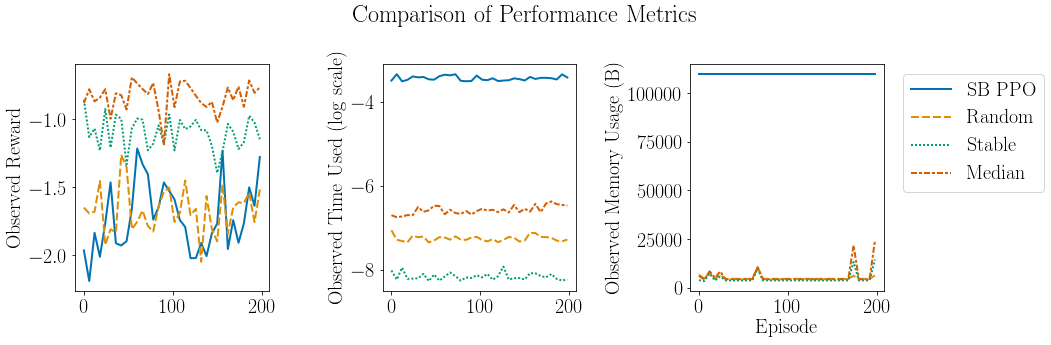

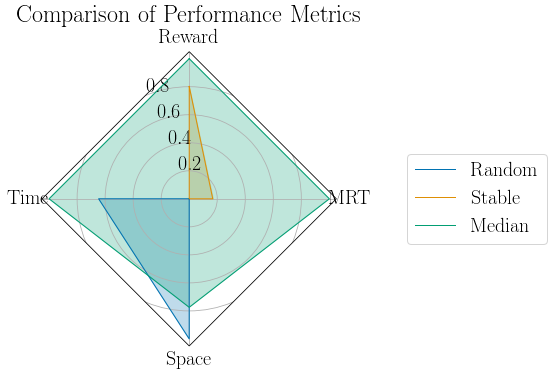

In [6]:
path_list_line = []
path_list_radar = []
algo_list_line = []
algo_list_radar = []

for agent in agents:
    print(str(agent))
    path_list_line.append('../data/ambulance_metric_test_'+str(agent)+'/data.csv')
    algo_list_line.append(str(agent))
    if agent != 'SB PPO':    
        path_list_radar.append('../data/ambulance_metric_test_'+str(agent)+'/')
        algo_list_radar.append(str(agent))

    

fig_path = '../figures/'
fig_name = 'test_ambulance_metric.pdf'

or_suite.plots.plot_line_plots(path_list_line, algo_list_line, fig_path, fig_name, int(nEps / 40) + 1)

additional_metric = {'MRT': lambda traj : or_suite.utils.mean_response_time(traj, lambda x, y : np.abs(x-y))}


or_suite.plots.plot_radar_plots(path_list_radar, algo_list_radar, fig_path, fig_name, additional_metric)